<a href="https://colab.research.google.com/github/houstondatavis/data-jam-february-2019/blob/master/ClevelandMuseumOfArt_NLP_Playground_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Cleveland Museum of Art API - EXTRACTING ENTITIES 
## PLAYGROUND 3



# NLTK for natural language processing

## Premise:
### I WANT TO FIND ALL THE BLANK ENTITIES in the collections of the Cleveland Museum of Art

In [0]:
import urllib.request, json 

In [91]:
department_string = "Photography" #@param ["African Art", "American Painting and Sculpture", "Art of the Americas", "Chinese Art", "Contemporary Art", "Decorative Art and Design", "Drawings", "Egyptian and Ancient Near Eastern Art", "European Painting and Sculpture", "Greek and Roman Art", "Indian and South East Asian Art", "Islamic Art", "Japanese Art", "Korean Art", "Medieval Art", "Modern European Painting and Sculpture", "Oceania", "Performing Arts, Music, & Film", "Photography", "Prints", "Textiles"]
print(department_string)

Photography


In [0]:
urlString_1 = 'https://openaccess-api.clevelandart.org/api/artworks/?cc0=1&department='+department_string+'&has_image=1&limit=60000'

In [0]:
urlString_2 = 'https://openaccess-api.clevelandart.org/api/artworks/?cc0=1&has_image=1&limit=31000'

In [0]:
def getDataFromAPI(fullUrlStr):
  with urllib.request.urlopen(fullUrlStr) as url:
    data = json.loads(url.read().decode())
    return data

In [0]:
data = getDataFromAPI(urlString_2)

In [98]:
#### This is what the "info" part of the dict retuned looks like
data['info']

{'parameters': {'cc0': '1', 'has_image': '1', 'limit': '31000'},
 'total': 29164}

In [99]:
#### The data key of the dict is an array of all the artwork objects. Below, I'm returning the first item in the array.
data['data'][0]

{'accession_number': '1335.1917',
 'catalogue_raisonne': None,
 'citations': [{'citation': 'Hoffman, Charles Fenno. <em>New-York Mirror, </em>June 1838.',
   'page_number': 'Mentioned: p. 367, 390',
   'url': None},
  {'citation': '"The Matthews Sale." <em>American Art News. </em>12:20 (February 21, 1914).',
   'page_number': 'Mentioned: p. 8',
   'url': None},
  {'citation': '"Matthews Pictures Sold." <em>American Art News.</em> 14:16 (January 22, 1916).',
   'page_number': 'Mentioned: p. 3, no. 55',
   'url': None},
  {'citation': '"Accessions." <em>The Bulletin of the Cleveland Museum of Art. </em>4:4 (April-May 1917).',
   'page_number': 'Mentioned: p. 64-67',
   'url': None},
  {'citation': 'Downes, William Howe. "American Painters of Mountains." <em>The American Magazine of Art.</em> 25:4 (October, 1932).',
   'page_number': 'Reproduced: p. 194',
   'url': None},
  {'citation': 'Francis, Henry S. "Thomas Cole: Painter of the Catskill Mountains." <em>The Bulletin of The Cleveland 

## Now let's see if we can get entities out of an example text string

In [100]:
from nltk import ne_chunk, pos_tag, word_tokenize  
from nltk.tree import Tree
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [0]:
def get_continuous_chunks(text):
  chunked = ne_chunk(pos_tag(word_tokenize(text)))
  continuous_chunk = []
  current_chunk = []
  for i in chunked:
    if type(i) == Tree:
      current_chunk.append(" ".join([token for token, pos in i.leaves()]))
    elif current_chunk:
      named_entity = " ".join(current_chunk)
      if named_entity not in continuous_chunk:
        continuous_chunk.append(named_entity)
        current_chunk = []
    else:
      continue
  return continuous_chunk

In [0]:
test_text_input = data['data'][0]['title']

In [0]:
text_test = get_continuous_chunks(test_text_input)

In [103]:
text_test

['Schroon Mountain', 'Essex County', 'New York']

Okay, so that works. Now lets throw the json into pandas dataframe, create a new dataframe column that is all the text fields with entitles, and then run entity extraction on text in that column and push it to another column. After that point, we'll make a UMAP 

In [104]:
type(data['data'])

list

In [0]:
import pandas as pd
from pandas.io.json import json_normalize

In [0]:
data_normalized = json_normalize(data['data'])
data_df = pd.DataFrame.from_records(data_normalized)

In [106]:
data_df[0:10]

accession_number catalogue_raisonne  \
0        1335.1917               None   
1         1915.534               None   
2          1936.19               None   
3          1958.21               None   
4          1958.32               None   
5         1943.392               None   
6        1942.1065               None   
7          1958.34               None   
8         1947.209               None   
9         1953.155               None   

                                           citations  \
0  [{'citation': 'Hoffman, Charles Fenno. <em>New...   
1  [{'citation': None, 'page_number': None, 'url'...   
2  [{'citation': 'Rivière, Georges. <em>Le Maît...   
3  [{'citation': 'Wedderkop, Hans von. <em>Paul C...   
4  [{'citation': 'Flechtheim, Alfred. "Kunsthaler...   
5  [{'citation': 'Haberfeld, Hugo. "Die französis...   
6  [{'citation': '<em>Revue de l'Art Ancien et Mo...   
7  [{'citation': None, 'page_number': None, 'url'...   
8  [{'citation': 'Meyer-Riefstahl, R. "Vincent Va...   
9  [{'citation': None, 'page_number': None, 'url'...   

                      collection copyright creation_date  \
0            American - Painting      None          1838   
1            American - Painting      None       c. 1765   
2  Mod Euro - Painting 1800-1960      None          1890   
3  Mod Euro - Painting 1800-1960      None       c. 1904   
4  Mod Euro - Painting 1800-1960      None          1889   
5  Mod Euro - Painting 1800-1960      None          1902   
6  Mod Euro - Painting 1800-1960      None          1864   
7  Mod Euro - Painting 1800-1960      None    c. 1869-73   
8  Mod Euro - Painting 1800-1960      None          1889   
9  Mod Euro - Painting 1800-1960      None          1864   

   creation_date_earliest  creation_date_latest  \
0                  1838.0                1838.0   
1                  1760.0                1770.0   
2                  1890.0                1890.0   
3                  1899.0                1909.0   
4                  1889.0                1889.0   
5                  1902.0                1902.0   
6                  1864.0                1864.0   
7                  1869.0                1873.0   
8                  1889.0                1889.0   
9                  1864.0                1864.0   

                                            creators  \
0  [{'description': 'Thomas Cole (American, 1801-...   
1  [{'description': 'John Singleton Copley (Ameri...   
2  [{'description': 'Paul Cézanne (French, 1839-1...   
3  [{'description': 'Paul Cézanne (French, 1839-1...   
4  [{'description': 'Vincent van Gogh (Dutch, 185...   
5  [{'description': 'Paul Gauguin (French, 1848-1...   
6  [{'description': 'Pierre-Auguste Renoir (Frenc...   
7  [{'description': 'Edouard Manet (French, 1832-...   
8  [{'description': 'Vincent van Gogh (Dutch, 185...   
9  [{'description': 'Claude Monet (French, 1840-1...   

                                          creditline  \
0                       Hinman B. Hurlbut Collection   
1  Gift of the John Huntington Art and Polytechni...   
2                     The James W. Corrigan Memorial   
3                   Bequest of Leonard C. Hanna, Jr.   
4                   Bequest of Leonard C. Hanna, Jr.   
5                             Gift of the Hanna Fund   
6                             Gift of the Hanna Fund   
7                   Bequest of Leonard C. Hanna, Jr.   
8                             Gift of the Hanna Fund   
9                             Gift of the Hanna Fund   

                         ...                         state_of_the_work  \
0                        ...                                      None   
1                        ...                                      None   
2                        ...                                      None   
3                        ...                                      None   
4                        ...                                      None   
5                        ...    

In [0]:
# def combineTextFields(df,fields_list):
#   new_text = ""
#   for field in fields_list:
#     if df[field] == None:
#       pass
#     else:
#       new_text = new_text+df[field]
#   return new_text
   
# data_df['tombstonePlusDescription'] = data_df['title']+data_df['tombstone']+data_df['wall_description']

In [0]:
data_df["safe_wall_description"] = data_df["wall_description"]



In [0]:
data_df["safe_wall_description"].fillna(value='', inplace=True)

In [109]:
data_df[0:4]

accession_number catalogue_raisonne  \
0        1335.1917               None   
1         1915.534               None   
2          1936.19               None   
3          1958.21               None   

                                           citations  \
0  [{'citation': 'Hoffman, Charles Fenno. <em>New...   
1  [{'citation': None, 'page_number': None, 'url'...   
2  [{'citation': 'Rivière, Georges. <em>Le Maît...   
3  [{'citation': 'Wedderkop, Hans von. <em>Paul C...   

                      collection copyright creation_date  \
0            American - Painting      None          1838   
1            American - Painting      None       c. 1765   
2  Mod Euro - Painting 1800-1960      None          1890   
3  Mod Euro - Painting 1800-1960      None       c. 1904   

   creation_date_earliest  creation_date_latest  \
0                  1838.0                1838.0   
1                  1760.0                1770.0   
2                  1890.0                1890.0   
3                  1899.0                1909.0   

                                            creators  \
0  [{'description': 'Thomas Cole (American, 1801-...   
1  [{'description': 'John Singleton Copley (Ameri...   
2  [{'description': 'Paul Cézanne (French, 1839-1...   
3  [{'description': 'Paul Cézanne (French, 1839-1...   

                                          creditline  \
0                       Hinman B. Hurlbut Collection   
1  Gift of the John Huntington Art and Polytechni...   
2                     The James W. Corrigan Memorial   
3                   Bequest of Leonard C. Hanna, Jr.   

                         ...                         support_materials  \
0                        ...                                        []   
1                        ...                                        []   
2                        ...                                        []   
3                        ...                                        []   

       technique                                              title  \
0  oil on canvas  View of Schroon Mountain, Essex County, New Yo...   
1  oil on canvas                                     Nathaniel Hurd   
2  oil on fabric                       The Pigeon Tower at Bellevue   
3  oil on fabric                              Mount Sainte-Victoire   

  title_in_original_language  \
0                       None   
1                       None   
2                       None   
3                       None   

                                           tombstone      type  \
0  View of Schroon Mountain, Essex County, New Yo...  Painting   
1  Nathaniel Hurd, c. 1765. John Singleton Copley...  Painting   
2  The Pigeon Tower at Bellevue, 1890. Paul Cézan...  Painting   
3  Mount Sainte-Victoire, c. 1904. Paul Cézanne (...  Painting   

                   updated_at                                     url  \
0  2019-02-23 16:10:19.484000  https://clevelandart.org/art/1335.1917   
1  2019-02-23 16:15:24.884000   https://clevelandart.org/art/1915.534   
2  2019-02-23 17:15:32.423000    https://clevelandart.org/art/1936.19   
3  2019-02-23 18:15:13.843000    https://clevelandart.org/art/1958.21   

                                    wall_description  \
0  Championing the unspoiled American wilderness,...   
1  Hurd was a prominent silversmith and engraver ...   
2  Cézanne was among the first artists to break w...   
3  During the last twenty years of his life, Céza...   

                               safe_wall_description  
0  Championing the unspoiled American wilderness,...  
1  Hurd was a prominent silversmith and engraver ...  
2  Cézanne was among the first artists to break w...  
3  During the last twenty years of his life, Céza...  

[4 rows x 231 columns]

In [0]:
data_df['tombstonePlusDescription'] = data_df['title']+data_df['tombstone']+data_df['safe_wall_description']

In [111]:
data_df[0:4]

accession_number catalogue_raisonne  \
0        1335.1917               None   
1         1915.534               None   
2          1936.19               None   
3          1958.21               None   

                                           citations  \
0  [{'citation': 'Hoffman, Charles Fenno. <em>New...   
1  [{'citation': None, 'page_number': None, 'url'...   
2  [{'citation': 'Rivière, Georges. <em>Le Maît...   
3  [{'citation': 'Wedderkop, Hans von. <em>Paul C...   

                      collection copyright creation_date  \
0            American - Painting      None          1838   
1            American - Painting      None       c. 1765   
2  Mod Euro - Painting 1800-1960      None          1890   
3  Mod Euro - Painting 1800-1960      None       c. 1904   

   creation_date_earliest  creation_date_latest  \
0                  1838.0                1838.0   
1                  1760.0                1770.0   
2                  1890.0                1890.0   
3                  1899.0                1909.0   

                                            creators  \
0  [{'description': 'Thomas Cole (American, 1801-...   
1  [{'description': 'John Singleton Copley (Ameri...   
2  [{'description': 'Paul Cézanne (French, 1839-1...   
3  [{'description': 'Paul Cézanne (French, 1839-1...   

                                          creditline  \
0                       Hinman B. Hurlbut Collection   
1  Gift of the John Huntington Art and Polytechni...   
2                     The James W. Corrigan Memorial   
3                   Bequest of Leonard C. Hanna, Jr.   

                         ...                              technique  \
0                        ...                          oil on canvas   
1                        ...                          oil on canvas   
2                        ...                          oil on fabric   
3                        ...                          oil on fabric   

                                               title  \
0  View of Schroon Mountain, Essex County, New Yo...   
1                                     Nathaniel Hurd   
2                       The Pigeon Tower at Bellevue   
3                              Mount Sainte-Victoire   

  title_in_original_language  \
0                       None   
1                       None   
2                       None   
3                       None   

                                           tombstone      type  \
0  View of Schroon Mountain, Essex County, New Yo...  Painting   
1  Nathaniel Hurd, c. 1765. John Singleton Copley...  Painting   
2  The Pigeon Tower at Bellevue, 1890. Paul Cézan...  Painting   
3  Mount Sainte-Victoire, c. 1904. Paul Cézanne (...  Painting   

                   updated_at                                     url  \
0  2019-02-23 16:10:19.484000  https://clevelandart.org/art/1335.1917   
1  2019-02-23 16:15:24.884000   https://clevelandart.org/art/1915.534   
2  2019-02-23 17:15:32.423000    https://clevelandart.org/art/1936.19   
3  2019-02-23 18:15:13.843000    https://clevelandart.org/art/1958.21   

                                    wall_description  \
0  Championing the unspoiled American wilderness,...   
1  Hurd was a prominent silversmith and engraver ...   
2  Cézanne was among the first artists to break w...   
3  During the last twenty years of his life, Céza...   

                               safe_wall_description  \
0  Championing the unspoiled American wilderness,...   
1  Hurd was a prominent silversmith and engraver ...   
2  Cézanne was among the first artists to break w...   
3  During the last twenty years of his life, Céza...   

                            tombstonePlusDescription  
0  View of Schroon Mountain, Essex County, New Yo...  
1  Nathaniel HurdNathaniel Hurd, c. 1765. John Si...  
2  The Pigeon Tower at BellevueThe Pigeon Tower a...  
3  Mount Sainte-VictoireMount Sainte-Victoire, c....  

[4 rows x 232 columns]

In [0]:
data_df['tombstonePlusDescription_entities']  = data_df['tombstonePlusDescription'].apply(lambda x: get_continuous_chunks(x))

In [124]:
data_df[0:2]

accession_number catalogue_raisonne  \
0        1335.1917               None   
1         1915.534               None   

                                           citations           collection  \
0  [{'citation': 'Hoffman, Charles Fenno. <em>New...  American - Painting   
1  [{'citation': None, 'page_number': None, 'url'...  American - Painting   

  copyright creation_date  creation_date_earliest  creation_date_latest  \
0      None          1838                  1838.0                1838.0   
1      None       c. 1765                  1760.0                1770.0   

                                            creators  \
0  [{'description': 'Thomas Cole (American, 1801-...   
1  [{'description': 'John Singleton Copley (Ameri...   

                                          creditline  \
0                       Hinman B. Hurlbut Collection   
1  Gift of the John Huntington Art and Polytechni...   

                         ...                          \
0                        ...                           
1                        ...                           

                                               title  \
0  View of Schroon Mountain, Essex County, New Yo...   
1                                     Nathaniel Hurd   

  title_in_original_language  \
0                       None   
1                       None   

                                           tombstone      type  \
0  View of Schroon Mountain, Essex County, New Yo...  Painting   
1  Nathaniel Hurd, c. 1765. John Singleton Copley...  Painting   

                   updated_at                                     url  \
0  2019-02-23 16:10:19.484000  https://clevelandart.org/art/1335.1917   
1  2019-02-23 16:15:24.884000   https://clevelandart.org/art/1915.534   

                                    wall_description  \
0  Championing the unspoiled American wilderness,...   
1  Hurd was a prominent silversmith and engraver ...   

                               safe_wall_description  \
0  Championing the unspoiled American wilderness,...   
1  Hurd was a prominent silversmith and engraver ...   

                            tombstonePlusDescription  \
0  View of Schroon Mountain, Essex County, New Yo...   
1  Nathaniel HurdNathaniel Hurd, c. 1765. John Si...   

                   tombstonePlusDescription_entities  
0  [Schroon Mountain, Essex County, New York, Sch...  
1  [Nathaniel HurdNathaniel Hurd, John Singleton ...  

[2 rows x 233 columns]

In [125]:
data_df.keys()

Index(['accession_number', 'catalogue_raisonne', 'citations', 'collection',
       'copyright', 'creation_date', 'creation_date_earliest',
       'creation_date_latest', 'creators', 'creditline',
       ...
       'title', 'title_in_original_language', 'tombstone', 'type',
       'updated_at', 'url', 'wall_description', 'safe_wall_description',
       'tombstonePlusDescription', 'tombstonePlusDescription_entities'],
      dtype='object', length=233)

In [0]:


data_df['tombstonePlusDescription_str'] = data_df['tombstonePlusDescription'].apply(lambda x: ''.join(x))

In [128]:
type(data_df)

pandas.core.frame.DataFrame

In [0]:
def findStrings(df,text_col,thing_to_find):
#   for row in range(0,len(df)):
#     print(df[row][text_col])
  df_subset = df[df[text_col].str.contains(thing_to_find)]
  return df_subset
    
  
  
  
  

In [0]:
subset_by_string_df = findStrings(data_df,'tombstonePlusDescription_str','dogs')

In [131]:
subset_by_string_df 

accession_number catalogue_raisonne  \
68          1958.425               None   
240         1957.497               None   
277         1972.167               None   
845          1964.37               None   

                                             citations  \
68   [{'citation': 'The Cleveland Museum of Art. <e...   
240  [{'citation': 'The Cleveland Museum of Art. <e...   
277  [{'citation': 'The Cleveland Museum of Art. <e...   
845  [{'citation': 'The Cleveland Museum of Art. <e...   

                 collection copyright  creation_date  creation_date_earliest  \
68   P - German before 1800      None           1540                  1540.0   
240         MED - Byzantine      None      late 300s                   375.0   
277            MED - Gothic      None      1200-1250                  1200.0   
845        AA - Mesoamerica      None  200 BC-AD 300                   200.0   

     creation_date_latest                                           creators  \
68                 1540.0  [{'description': 'Lucas Cranach (German, 1472-...   
240                 399.0                                                 []   
277                1250.0                                                 []   
845                 300.0                                                 []   

                                            creditline  \
68                              John L. Severance Fund   
240  Purchase from the J. H. Wade Fund with the add...   
277  Gift of Mrs. Chester D. Tripp in honor of Ches...   
845                     Cornelia Blakemore Warner Fund   

                           ...                          \
68                         ...                           
240                        ...                           
277                        ...                           
845                        ...                           

    title_in_original_language  \
68                        None   
240                       None   
277                       None   
845                       None   

                                             tombstone       type  \
68   Hunting near Hartenfels Castle, 1540. Lucas Cr...   Painting   
240  Ewer (Pitcher) with Game, Seafood, and Wine Sc...  Metalwork   
277  Lion Aquamanile, 1200-1250. Germany, Lower Sax...  Sculpture   
845  Male Dog, 200 BC-AD 300. West Mexico, Colima, ...  Sculpture   

                     updated_at                                    url  \
68   2019-02-23 18:15:54.370000  https://clevelandart.org/art/1958.425   
240  2019-02-23 18:14:19.239000  https://clevelandart.org/art/1957.497   
277  2019-02-23 18:54:34.144000  https://clevelandart.org/art/1972.167   
845  2019-02-23 18:37:37.740000   https://clevelandart.org/art/1964.37   

                                      wall_description  \
68   The Protestant rulers of Saxony commissioned t...   
240  This magnificent pitcher, called a ewer, was a...   
277  An aquamanile is a water vessel used for washi...   
845  One of the best-known subjects of West Mexican...   

                                 safe_wall_description  \
68   The Protestant rulers of Saxony commissioned t...   
240  This magnificent pitcher, called a ewer, was a...   
277  An aquamanile is a water vessel used for washi...   
845  One of the best-known subjects of West Mexican...   

                              tombstonePlusDescription  \
68   Hunting near Hartenfels CastleHunting near Har...   
240  Ewer (Pitcher) with Game, Seafood, and Wine Sc...   
277  Lion AquamanileLion Aquamanile, 1200-1250. Ger...   
845  Male DogMale Dog, 200 BC-AD 300. West Mexico, ...   

                     tombstonePlusDescription_entities  \
68   [Hartenfels, Hartenfels Castle, Cranach, Germa...   
240  [Ewer, Game, Seafood, Wine ScenesEwer, Game Se...   
277  [Lion AquamanileLion Aquamanile, Germany, Lowe...   
845  [Male DogMale Dog, West Mexico, Colima, Comala...   

                          tombstonePlusDescription_str  
68  

In [0]:
import requests
from PIL import Image
import requests
from io import BytesIO

In [0]:
#cma_url_chineseVase = 'https://openaccess-cdn.clevelandart.org/1962.154/1962.154_web.jpg'

In [0]:
# response = requests.get(cma_url_chineseVase)
# imgChineVase = Image.open(BytesIO(response.content))
# imgChineVase

In [0]:
def visualizeImage(url):
#   response = requests.get(url)
#   imgChineVase = Image.open(BytesIO(response.content))
#   print(imgChineVase)
#   return imgChineVase

  response = requests.get(url)
  imgChineVase = Image.open(BytesIO(response.content))
  print(imgChineVase)
  return imgChineVase

In [0]:
def selectImgToSee(df,itemNumb):
  titles = list(df['title'])
  item_df = df.loc[df['title'] == titles[itemNumb]]
  #creationDates =
  #creation_date
  creationDate = list(df['creation_date'])[itemNumb]
  
  #print(titles[itemNumb])
  #print(item_df)
  #url = item_df['images.web.url']
  return titles[itemNumb],creationDate

In [0]:
#url = subset_by_string_df.columns

In [0]:
title = selectImgToSee(subset_by_string_df,0)

In [146]:
title

('Hunting near Hartenfels Castle', '1540')

In [0]:
# url

In [0]:
# url = str(url)

In [0]:
# url

In [0]:
#type(url)

In [148]:
type(data_normalized)

pandas.core.frame.DataFrame

In [149]:
type(data['data'])

list

In [0]:
def findArtWithTitle(list_artwork,title):
  artwork = []
  for item in data['data']:
    if item['title'] == title:
      return item

In [0]:
artwork_obj_with_title = findArtWithTitle(data['data'],title)

In [0]:
def getUrlByArtWorkObj(art_obj):
  url = art_obj['images']['web']['url']
  return url

In [153]:
url_for_artwork_in_q = getUrlByArtWorkObj(artwork_obj_with_title)

TypeError: ignored

In [143]:
url_for_artwork_in_q

'https://openaccess-cdn.clevelandart.org/1991.262/1991.262_web.jpg'

In [0]:
#artwork_obj_with_title

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=684x893 at 0x7FB2810AD0F0>


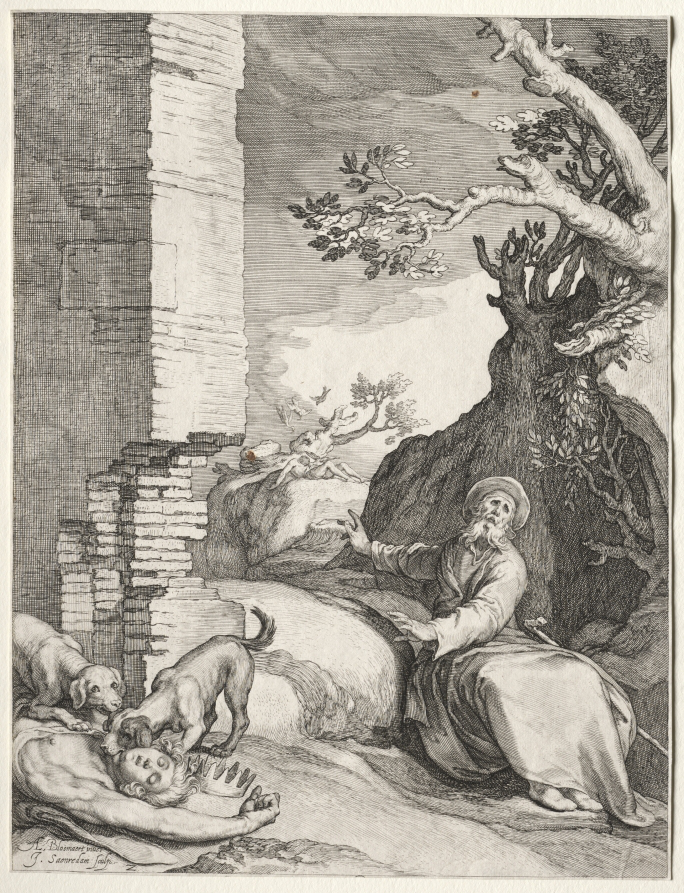

In [119]:
visualizeImage(url_for_artwork_in_q)

In [0]:
def find_blank_in_artwork(data_df,thing_string,number_of_results_list):
  subset_by_string_df = findStrings(data_df,'tombstonePlusDescription_str',thing_string)
  length_results = len(subset_by_string_df)
  print("number of results is : ",length_results)
  title,creationDate = selectImgToSee(subset_by_string_df,number_of_results_list)
  print("title is: ",title)
  print("creation date: ",creationDate)
  artwork_obj_with_title = findArtWithTitle(data['data'],title)
  
  url_for_artwork_in_q = getUrlByArtWorkObj(artwork_obj_with_title)
  
  image_returned = visualizeImage(url_for_artwork_in_q)
  
  return image_returned
  

number of results is :  8
title is:  Lazarus and the Rich Man
creation date:  c. 1550
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1263x830 at 0x7FB27E719C50>


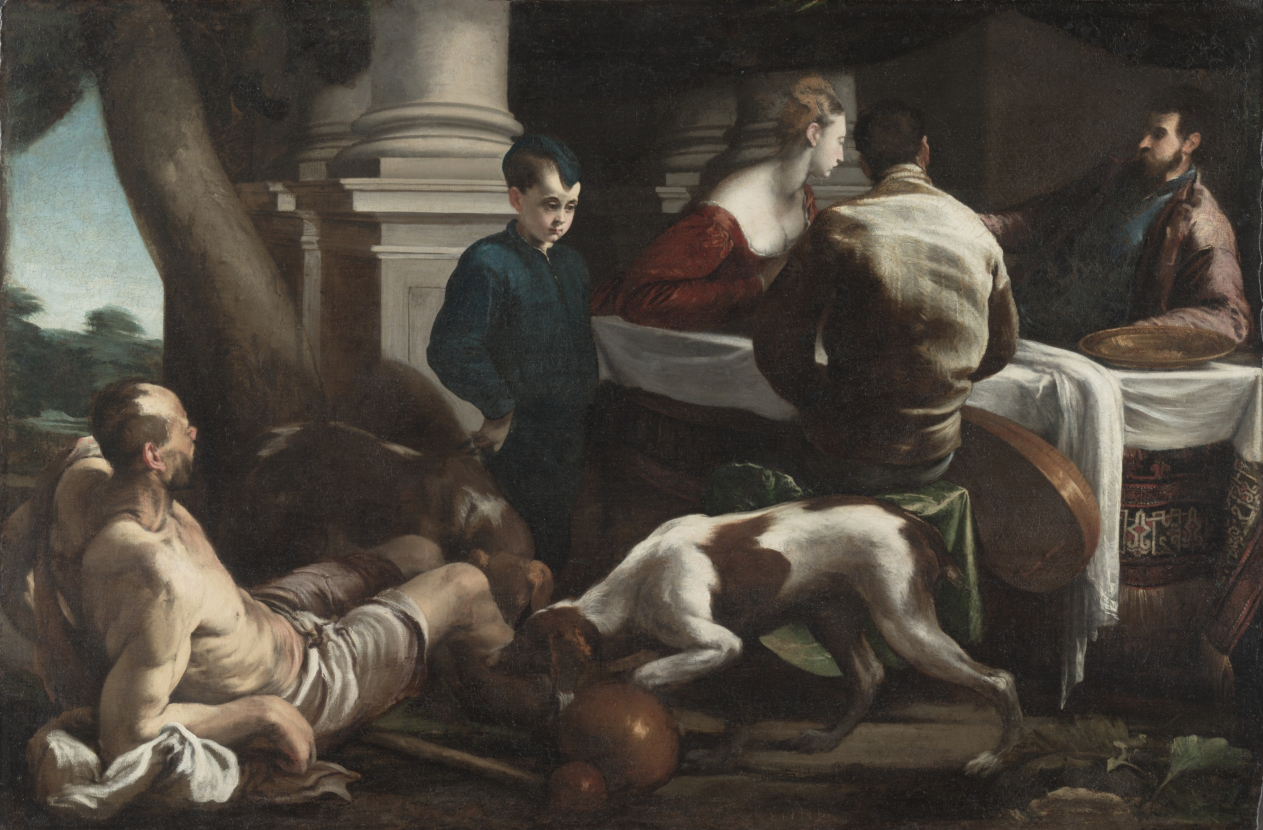

In [164]:
image_result = find_blank_in_artwork(data_df,"Dog",2)
image_result

In [0]:
# cats